<a href="https://colab.research.google.com/github/Sgodilla/CPSC_471_Final_Report/blob/main/CPSC_471_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Array of classes (can have 10 at max)
topics = [
    "regulations and regulators (includes price caps)",
    "internal projects -- progress and strategy",
    "company image -- current",
    "company image -- changing / influencing",
    "political influence / contributions / contacts",
    "california energy crisis / california politics",
    "internal company policy",
    "internal company operations",
    "alliances / partnerships",
    "legal advice",
    "talking points",
    "meeting minutes",
    "trip reports",
]

# print(topics[0])
print(len(topics))

13


In [ ]:
# Read categories file
def get_email_thread_topics(email_thread):
  with open(email_thread) as f:
    # Print all lines
    lines = f.readlines()
    # print(lines)

    # Print only the lines starting with number 3
    email_thread_topics = []
    for line in lines:
      category = line.split(',')
      if category[0] == "3":
        # print(category)
        # Second number in category array is topic index
        email_thread_topics.append(topics[int(category[1]) - 1])

    # Create tuple of file and topics
    email_thread = (f.name, email_thread_topics)
    # print(email_thread)
    return email_thread_topics

# print(get_email_thread_topics('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/6178.cats'))

In [ ]:
import re

def extract_email_content(file_path):
    with open(file_path, 'r') as file:
        data = file.read()

    # Regular expression to split the full text into separate emails based on "Message-ID"
    emails = re.split(r'\n(?=Message-ID: <)', data)

    filtered_emails = []

    for email in emails:
        # Extracting the subject
        subject_match = re.search(r'Subject: (.+)', email)
        if subject_match:
            subject = subject_match.group(1)
        else:
            subject = "No Subject Found"

        # Finding the start of the email content
        content_start = email.find('\n\n')  # Assumes the actual content starts after two newlines following the header
        if content_start != -1:
            content = email[content_start:].strip()

            # Remove any re-forwarded or replied to headers and metadata within the content
            content = re.sub(r'(\n-+\s*Original Message\s*-+\n|\n>.*|\nOn.*wrote:).*', '', content, flags=re.S)
            content = re.sub(r'\n.*@.*\son\s.*\n', '', content, flags=re.S)  # For removing any timestamped sender lines
            content = re.sub(r'\nFrom:.*\n?', '', content)  # Remove any nested 'From' lines
            content = re.sub(r'\nSent:.*\n?', '', content)  # Remove 'Sent' timestamps
            content = re.sub(r'\nTo:.*\n?', '', content)  # Remove 'To' lines
            content = re.sub(r'\nCc:.*\n?', '', content)  # Remove 'Cc' lines
            content = re.sub(r'\nSubject:.*\n?', '', content)  # Remove nested 'Subject' lines
            content = re.sub(r'\n.*@.*wrote:\n', '', content)  # Remove inline reply headers

            # Adding the final cleaned email to the list
            filtered_emails.append(f"Subject: {subject}\n{content}\n---\n")

    return '\n'.join(filtered_emails)

# print(extract_email_content('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/6178.txt'))

In [ ]:
# Read all files from directory
import os

In [ ]:
email_threads_dir = '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/'

# Loop through all files in email threads directory
email_threads = []
for filename in os.listdir(email_threads_dir):
  if filename.endswith('.txt'): # Check if the file is a text file
    basename, _ = os.path.splitext(filename)
    email_content_path = os.path.join(email_threads_dir, basename + '.txt')
    email_topics_path = os.path.join(email_threads_dir, basename + '.cats')
    email_threads.append((email_content_path, email_topics_path))

# Print first 10 email thread tuples and number of email threads
print(email_threads[:10])
print(len(email_threads))

[('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/226952.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/226952.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173928.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173928.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/55205.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/55205.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/116661.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/116661.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173978.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173978.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project

In [ ]:
# Get email topics
all_email_topics = []
for email_thread in email_threads:
  email_topics = get_email_thread_topics(email_thread[1])
  all_email_topics.extend(email_topics)

# Print first 10 email topics
print(all_email_topics[:10])

['internal company operations', 'regulations and regulators (includes price caps)', 'alliances / partnerships', 'california energy crisis / california politics', 'internal projects -- progress and strategy', 'california energy crisis / california politics', 'internal company operations', 'internal company operations', 'internal company operations', 'internal projects -- progress and strategy']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

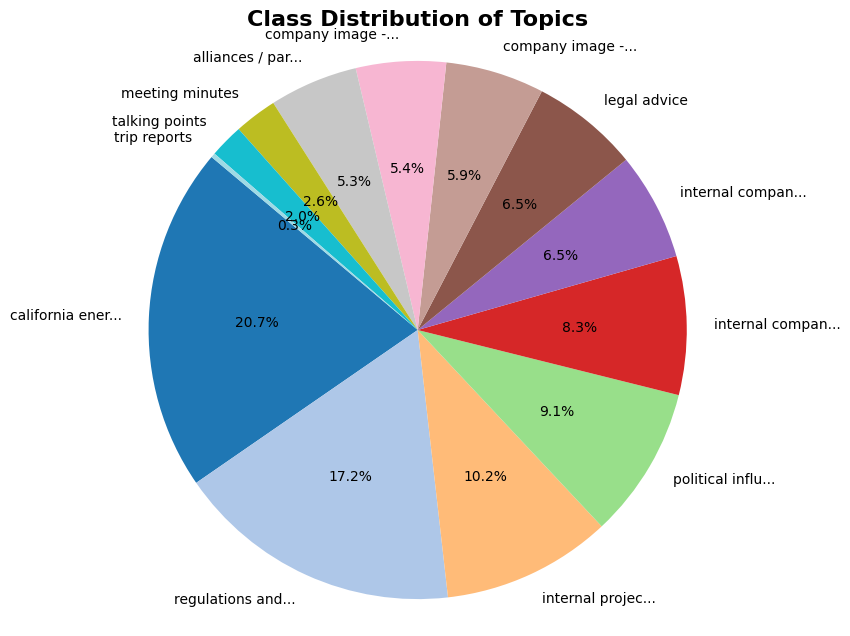

In [ ]:
# Assuming all_email_topics is defined
# Count the occurrences of each topic
topic_counts = Counter(all_email_topics)

# Sort topics by frequency
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)
sorted_labels = [item[0][:15] + '...' if len(item[0]) > 15 else item[0] for item in sorted_topics]
sorted_counts = [item[1] for item in sorted_topics]

# Generate a list of colors, one for each topic
# colors = plt.cm.viridis(np.linspace(0.90, 0.15, len(sorted_labels)))
colors = plt.get_cmap('tab20')(np.linspace(0, 1, len(sorted_labels)))

# Plot class distribution as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sorted_counts, labels=sorted_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Topics', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.subplots_adjust(top=0.85)  # Adjust the top margin to give more space for the title
plt.show()

In [ ]:
topics_to_skip = set([
    "talking points",
    "meeting minutes",
    "trip reports",
])
all_email_contents = []
all_email_topics = []
for email_thread in email_threads:
  email_topics = get_email_thread_topics(email_thread[1])
  if ((email_topics != []) and (not set(email_topics).intersection(topics_to_skip))):
    email_content = extract_email_content(email_thread[0])
    all_email_contents.append(email_content)
    all_email_topics.append(email_topics[0])


# print(all_email_contents[0])
print(all_email_topics[:10])
print(len(all_email_topics))

['internal company operations', 'regulations and regulators (includes price caps)', 'alliances / partnerships', 'california energy crisis / california politics', 'internal projects -- progress and strategy', 'california energy crisis / california politics', 'internal company operations', 'internal company operations', 'internal company operations', 'internal projects -- progress and strategy']
749


In [ ]:
!pip install transformers datasets
from transformers import pipeline
import torch
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, emails, labels, transform=None):
        self.emails = emails
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.emails)

    def __getitem__(self, idx):
        email = self.emails[idx]
        label = self.labels[idx]

        if self.transform:
            email = self.transform(email)

        return email, label

In [ ]:
email_dataset = EmailDataset(all_email_contents, all_email_topics, transform=None)
print(len(email_dataset))

749


In [ ]:
rand_example = random.randint(0, len(all_email_contents) - 1)
text = email_dataset.emails[rand_example]
label = email_dataset.labels[rand_example]

print(label)
print()
print(text)

legal advice

Subject: FW: SRP SETTLEMENT PROPOSAL - PRIVILEGED AND CONFIDENTIAL FOR
-----Original Message-----S-Joel+20Greene+20+3Cjlgreene+40energyadvocates+2Ecom+3E+40ENRON@ENRON.com]=
=20To:=09agold@coral-energy.com; amy.sheridan@williams.com; barryp@bp.com; bbr=
igham@sidrichgas.com; bealljp@texaco.com; bgray@cc.state.az.us; Bgray@EPEle=
ctric.com; bjost@huberlaw.com; bruce.a.connell@usa.conoco.com; bwhitta@pnm.=
com; carla.j.johnson@usa.conoco.com; carpentierd@dsmo.com; caschindler@hhla=
w.com; catherine.palazzari@elpaso.com; cbrechte@apsc.com; cbulf@oneok.com; =
coganja@aol.com; craigc@calpine.com; cynthiacorcoran@corcoran-law.com; dani=
el.collins@elpaso.com; daswanstrom@verner.com; Dave Huard Esq. (E-mail) (E-=
mail); dbmcvick@srpnet.com; dfulton@enron.com; dga@sloverandloftus.com; djo=
hn@jhenergy.com; dkirkla@pnm.com; dlh@jmbm.com; dlsmith@pplweb.com; dmcwash=
@mshpc.com; douglas.porter@sce.com; dtom@btuwatch.com; Dwilliams@kmg.com; e=
aro@dynegy.com; edward.mcmurtrie@swgas.

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from torch import Tensor

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [ ]:
# Mean Pooling - Take average of all tokens
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


#Encode text
def encode(texts):
    # Tokenize sentences
    encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input, return_dict=True)

    # Perform pooling
    embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    embeddings = F.normalize(embeddings, p=2, dim=1)

    return embeddings

In [ ]:
# Compute topic embeddings
topic_emb = encode(topics)

In [ ]:
# Calculate score for random example

#Encode email
email_emb = encode(text) # Convert email into embeddings

#Compute dot score between query and all document embeddings
scores = torch.mm(email_emb, topic_emb.transpose(0, 1))[0].tolist()

#Combine docs & scores
topic_score_pairs = list(zip(topics, scores))
topic_score_pairs = sorted(topic_score_pairs, key=lambda x: x[1], reverse=True)

# Print Score
print(topic_score_pairs)

[('california energy crisis / california politics', 0.17711973190307617), ('alliances / partnerships', 0.10264734923839569), ('legal advice', 0.09698539972305298), ('trip reports', 0.08203534036874771), ('internal company policy', 0.07023192942142487), ('talking points', 0.053092341870069504), ('meeting minutes', 0.028869206085801125), ('regulations and regulators (includes price caps)', 0.022069858387112617), ('internal projects -- progress and strategy', 0.02091255970299244), ('internal company operations', -0.007417486980557442), ('political influence / contributions / contacts', -0.01612260192632675), ('company image -- changing / influencing', -0.026957973837852478), ('company image -- current', -0.06209372356534004)]


In [ ]:
print(scores)

[0.022069858387112617, 0.02091255970299244, -0.06209372356534004, -0.026957973837852478, -0.01612260192632675, 0.17711973190307617, 0.07023192942142487, -0.007417486980557442, 0.10264734923839569, 0.09698539972305298, 0.053092341870069504, 0.028869206085801125, 0.08203534036874771]


In [ ]:
tot_num_emails = len(email_dataset)
num_correct = 0
results = []
all_scores = []

# Test accuracy of semantic search (no summary)
for i in range(tot_num_emails):
  email = email_dataset.emails[i]
  labels = email_dataset.labels[i]

  #Encode email
  email_emb = encode(email) # Convert email into embeddings

  #Compute dot score between query and all document embeddings
  scores = torch.mm(email_emb, topic_emb.transpose(0, 1))[0].tolist()
  all_scores.append(scores)

  #Combine docs & scores
  topic_score_pairs = list(zip(topics, scores))

  #Sort by decreasing score
  topic_score_pairs = sorted(topic_score_pairs, key=lambda x: x[1], reverse=True)
  top_topic, top_score =  topic_score_pairs[0]
  results.append(topic_score_pairs)

  if top_topic in labels:
    num_correct += 1

print(num_correct / tot_num_emails)

0.2857142857142857


In [ ]:
print(scores)

[0.20790472626686096, 0.235565647482872, 0.338453084230423, 0.2750660181045532, 0.15914075076580048, 0.17142313718795776, 0.41177132725715637, 0.40218716859817505, 0.24678704142570496, 0.14481225609779358, 0.009549632668495178, 0.1790308654308319, 0.14351218938827515]


In [ ]:
print(all_scores)

[[0.05205490440130234, 0.002730297390371561, 0.10501892119646072, 0.08560292422771454, 0.11670870333909988, 0.05759330838918686, 0.1482091248035431, 0.050105296075344086, 0.24149014055728912, 0.1458408534526825, 0.09865083545446396, 0.1529867798089981, 0.059594616293907166], [0.4650486707687378, 0.059248629957437515, 0.14846007525920868, 0.19180649518966675, 0.1491037905216217, 0.2568095028400421, 0.2421158254146576, 0.13911572098731995, 0.15888968110084534, 0.2521255612373352, 0.10712271183729172, 0.08230530470609665, 0.16191232204437256], [0.35503077507019043, 0.22203975915908813, 0.22405362129211426, 0.20122382044792175, 0.23254886269569397, 0.4141556918621063, 0.28606727719306946, 0.2886628210544586, 0.3351106643676758, 0.07123018056154251, 0.07766011357307434, 0.26008909940719604, 0.11646541953086853], [0.31870511174201965, 0.062740758061409, 0.125862717628479, 0.12286216020584106, 0.17731767892837524, 0.6211672425270081, 0.16674897074699402, 0.21835783123970032, 0.105413950979709

In [ ]:
# Find indices of the emails/scores with greatest confidence
def find_top_x_highest_max_scores(all_scores, x):
    # List to store top x max scores and their indices
    top_x = []

    # Iterate over the list of all_scores
    for index, score_list in enumerate(all_scores):
        # Find the maximum score in the current score list
        current_max_score = max(score_list)

        # Add the current max score and its index to the list
        top_x.append((current_max_score, index))
        # Sort the list by score in descending order and keep only the top x
        top_x = sorted(top_x, reverse=True, key=lambda x: x[0])[:x]

    # Return only the indices of the top x scores
    return [idx for score, idx in top_x]

# Find indices of the emails/scores with lowest confidence
def find_top_x_smallest_max_scores(all_scores, x):
    # List to store the top x smallest max scores and their indices
    top_x_smallest = []

    # Iterate over the list of all_scores
    for index, score_list in enumerate(all_scores):
        # Find the maximum score in the current score list
        current_max_score = max(score_list)

        # Add the current max score and its index to the list
        top_x_smallest.append((current_max_score, index))
        # Sort the list by score in ascending order and keep only the top x
        top_x_smallest = sorted(top_x_smallest, key=lambda x: x[0])[:x]

    # Return only the indices of the top x smallest scores
    return [idx for score, idx in top_x_smallest]

In [ ]:
# Top 5 highest confidence scores
top_5_confidence = find_top_x_highest_max_scores(all_scores, 5)
print(top_5_confidence)

[515, 294, 657, 67, 484]


In [ ]:
# Top 5 lowest confidence scores
bottom_5_confidence = find_top_x_smallest_max_scores(all_scores, 5)
print(bottom_5_confidence)

[53, 265, 427, 648, 106]


In [ ]:
# Print most confident email
most_confident_email = email_dataset.emails[top_5_confidence[0]]
most_confident_label = email_dataset.labels[top_5_confidence[0]]
most_confident_score = results[top_5_confidence[0]]

print(most_confident_score)
print()
print(most_confident_label)
print(most_confident_email)

[('california energy crisis / california politics', 0.7285254597663879), ('political influence / contributions / contacts', 0.22484688460826874), ('meeting minutes', 0.19200405478477478), ('trip reports', 0.18542416393756866), ('regulations and regulators (includes price caps)', 0.15937131643295288), ('company image -- current', 0.1516295075416565), ('talking points', 0.15028506517410278), ('alliances / partnerships', 0.1441899985074997), ('company image -- changing / influencing', 0.11822125315666199), ('legal advice', 0.09853693842887878), ('internal company policy', 0.09839164465665817), ('internal projects -- progress and strategy', 0.07805027812719345), ('internal company operations', 0.051160529255867004)]

political influence / contributions / contacts
Subject: Follow up for Ken
Rep Scott McGinnis (colo) told Ken that he would like to be briefed on the 
California and broader energy situation so that he can speak out on the issue.
Also, don't forget that we need to go see your b

In [ ]:
# Print least confident email
least_confident_email = email_dataset.emails[bottom_5_confidence[1]]
least_confident_label = email_dataset.labels[bottom_5_confidence[1]]
least_confident_score = results[bottom_5_confidence[1]]

print(least_confident_score)
print()
print(least_confident_label)
print(least_confident_email)

[('internal projects -- progress and strategy', 0.11186092346906662), ('california energy crisis / california politics', 0.10382388532161713), ('meeting minutes', 0.09838635474443436), ('regulations and regulators (includes price caps)', 0.09705332666635513), ('legal advice', 0.06666423380374908), ('political influence / contributions / contacts', 0.06552647799253464), ('trip reports', 0.0564899817109108), ('company image -- current', 0.04922173172235489), ('internal company policy', 0.0453525111079216), ('internal company operations', 0.027192814275622368), ('company image -- changing / influencing', 0.020333055406808853), ('alliances / partnerships', 0.016616323962807655), ('talking points', 0.014519705437123775)]

california energy crisis / california politics
Subject: No Subject Found
fyiMark Haedicke
---



# LIME Explanations for Most Confident and Least Confident

In [ ]:
def predict_proba(texts):
    if isinstance(texts, str):
        texts = [texts]  # Ensure input is a list of texts

    # Get predictions for each text
    output = []

    for text in texts:
      #Encode email
      email_emb = encode(text) # Convert email into embeddings

      #Compute dot score between query and all document embeddings
      scores = torch.mm(email_emb, topic_emb.transpose(0, 1))[0].tolist()
      output.append(scores)

    # #Combine docs & scores
    # topic_score_pairs = list(zip(topics, scores))

    # #Sort by decreasing score
    # topic_score_pairs = sorted(topic_score_pairs, key=lambda x: x[1], reverse=True)

    return np.array(output)

In [ ]:
# Test predict_proba function with most confident email
print(predict_proba([email_dataset.emails[top_5_confidence[0]], email_dataset.emails[top_5_confidence[1]]]))
print(results[top_5_confidence[0]])

[[0.15937132 0.07805028 0.15162951 0.11822125 0.22484688 0.72852546
  0.09839164 0.05116053 0.14419    0.09853694 0.15028507 0.19200405
  0.18542416]
 [0.2249448  0.05683854 0.11463526 0.09856258 0.1872775  0.69588733
  0.12455015 0.05261236 0.08194854 0.09733868 0.09696989 0.15275502
  0.10281686]]
[('california energy crisis / california politics', 0.7285254597663879), ('political influence / contributions / contacts', 0.22484688460826874), ('meeting minutes', 0.19200405478477478), ('trip reports', 0.18542416393756866), ('regulations and regulators (includes price caps)', 0.15937131643295288), ('company image -- current', 0.1516295075416565), ('talking points', 0.15028506517410278), ('alliances / partnerships', 0.1441899985074997), ('company image -- changing / influencing', 0.11822125315666199), ('legal advice', 0.09853693842887878), ('internal company policy', 0.09839164465665817), ('internal projects -- progress and strategy', 0.07805027812719345), ('internal company operations', 

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9c49c0a7b007b47b9b8c6f2907882922fd6c0343a6c103dab33234a378c0fb1e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer

# Create a LIME Text Explainer
explainer = LimeTextExplainer(class_names=topics)

In [ ]:
# Find index of label with most confidence
most_confident_index = np.argmax(all_scores[top_5_confidence[0]])
print(most_confident_index)

5


In [ ]:
# Generate explanation for most confident email
exp1 = explainer.explain_instance(most_confident_email, predict_proba, num_features=6, labels=[most_confident_index]) # Find top 6 most influential features (words), and give explanation for class name at index 5

In [ ]:
exp1.show_in_notebook(text=True)

In [ ]:
exp1.save_to_file('/content/results/most_confident_analysis.html')

In [ ]:
# Find index of label with least confidence
least_confident_index = np.argmax(all_scores[bottom_5_confidence[0]])
print(least_confident_index)

1


In [ ]:
# Generate explanation for second most confident email
exp2 = explainer.explain_instance(least_confident_email, predict_proba, num_features=6, labels=[least_confident_index]) # Find top 6 most influential features (words), and give explanation for class name at index 5

In [ ]:
exp2.show_in_notebook(text=True)

In [ ]:
exp2.save_to_file('/content/results/least_confident_analysis.html')